# 타이타닉 데이터 EDA

## EDA란?
Exploratory data analysis(탐색적 데이터 분석)으로 주어진 데이터를 다양한 방법으로 정보를 찾아내는 데이터 분석 방법  
모델링 이전 데이터를 확인하고 흟어보면서 데이터에 대한 이해를 목적으로 시행되며 이를 바탕으로 정교한 모델링을 수행 할 수 있다.

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## EDA 진행 예시

### 타이타닉 탑승자 데이터 불러오기

In [2]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install seaborn
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 데이터 로딩 및 확인
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [6]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


각 작업을 거친 후 데이터에 대한 리포트 혹은 시각화를 통해 얻을 수 있는 정보를 기술 해봅니다.  
위의 정보를 바탕으로 1309개의 샘플이 존재하지만 몇몇 개의 컬럼에는 결측치(비어있는 값)이 있음을 확인 할 수 있습니다

In [7]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


전체 탑승객의 생존률, 평균 연령 정도가 우리가 확인하고 추후 생각해보아야 할 데이터 같습니다.

## 샘플링으로 데이터 살펴보기
판다스 수업시간에 진행했던 팬시 인덱싱을 사용하여 다양한 가정을 통한 데이터를 살펴보겠습니다.  
전체 탑승객의 생존률은 38% 정도였지만 1등급 객실에 승선한 여성의 경우의 생존률을 알아보겠습니다.

In [8]:
df[(df['pclass']==1) & (df['sex']=='female') & (df['survived']==1)]['survived'].value_counts() # pclass 1이고 성별 여성이고 생존

1    139
Name: survived, dtype: int64

In [9]:
# 조건에 맞는 데이터 샘플링 645명, 생존자 400명
df[(df['pclass'] == 1) & (df['sex'] =='female')]['survived'].sum()

139

### 시각화로 데이터 살펴보기

#### 전체 탑승자 연령대 시각화

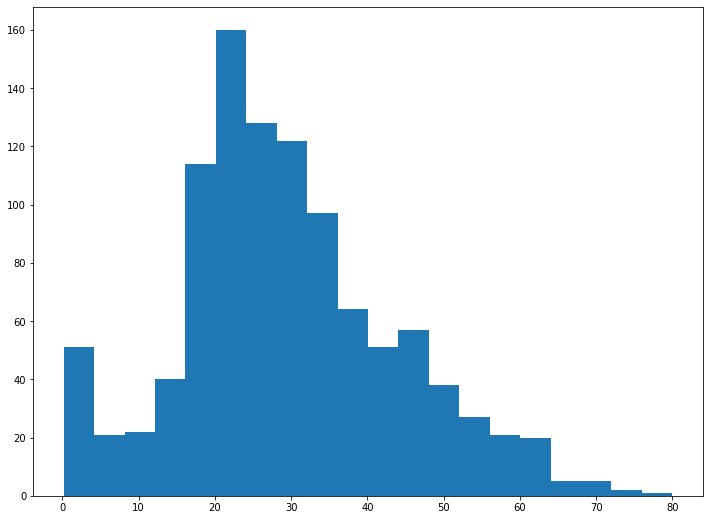

In [10]:
# 판다스 내장 함수로 시각화 가능
df['age'].hist(bins=20,figsize=(12,9),grid=False);

### 객실 등급별 생존률
판다스 수업시간에 진행하지는 않았지만 각 데이터의 범주에 따라 데이터를 분류하는 groupby 함수의 예시를 사용해보겠습니다.

In [11]:
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


## 전체 생존률

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


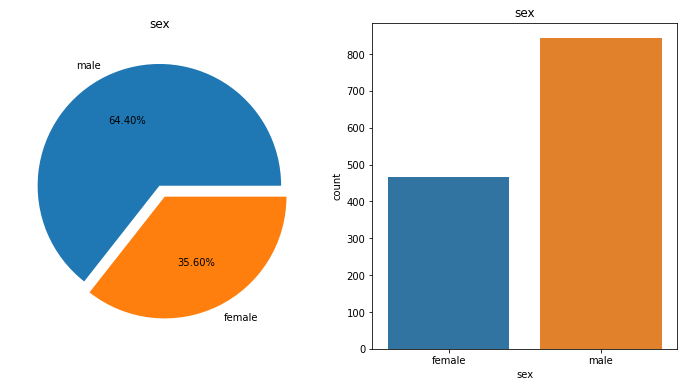

In [12]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=graph1)
graph1.set_title('sex')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('sex',data=df,ax=graph2)
graph2.set_title('sex')
plt.show(fig)

## 성별에 따른 생존자 분류

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


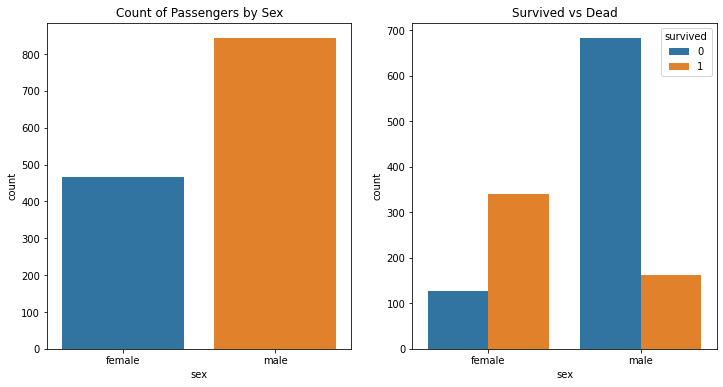

In [13]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
graph2 = fig.add_subplot(1,2,2)

sns.countplot('sex',data=df, ax=graph1)
graph1.set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=df, ax=graph2)
graph2.set_title('Survived vs Dead')
plt.show()

## 연령, 성별, 객실등급 한꺼번에

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


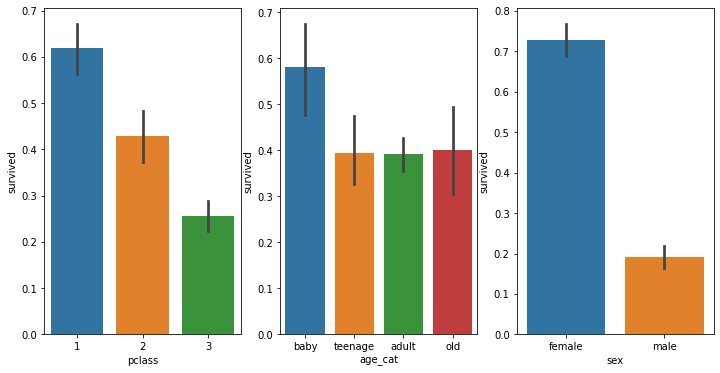

In [14]:
df['age_cat'] = pd.cut(df['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,3,1)
graph2 = fig.add_subplot(1,3,2)
graph3 = fig.add_subplot(1,3,3)

sns.barplot('pclass', 'survived', data=df, ax=graph1)
sns.barplot('age_cat', 'survived', data=df, ax=graph2)
sns.barplot('sex', 'survived', data=df, ax=graph3)

## 연령대별 분포 생존자, 사망자 비교

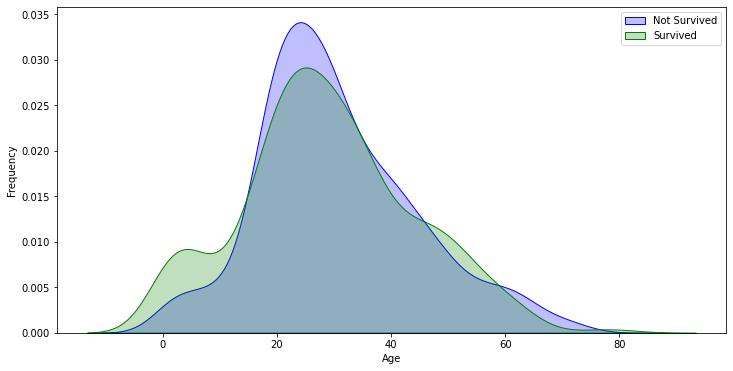

In [15]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,1,1)
sns.kdeplot(df["age"][(df["survived"] == 0) & (df["age"].notnull())], 
                ax = graph1, color="Blue", shade = True)
sns.kdeplot(df["age"][(df["survived"] == 1) & (df["age"].notnull())], 
                ax =graph1, color="Green", shade= True)
graph1.set_xlabel("Age")
graph1.set_ylabel("Frequency")
graph1.legend(["Not Survived","Survived"])

⇓⇓아래부터는 직접 진행한 project⇓⇓

In [16]:
print('사망자 수는', df[df['survived'] == 0]['survived'].value_counts())
print('생존자 수는', df[df['survived'] == 1]['survived'].value_counts())
print('body항목이 NaN인 개수는', df['body'].isna().sum())

사망자 수는 0    809
Name: survived, dtype: int64
생존자 수는 1    500
Name: survived, dtype: int64
body항목이 NaN인 개수는 1188


생존자라면 body항목이 NaN인 것은 자명하다. so 사망자면서 body항목이 NaN인 개수는 688개. 즉, 시체의 85%는 수습되지 않았다.

In [17]:
df['home.dest'].value_counts()

New York, NY                                    64
London                                          14
Montreal, PQ                                    10
Paris, France                                    9
Cornwall / Akron, OH                             9
                                                ..
Chelsea, London                                  1
Harrow-on-the-Hill, Middlesex                    1
Copenhagen, Denmark                              1
Guernsey / Montclair, NJ and/or Toledo, Ohio     1
Antwerp, Belgium / Stanton, OH                   1
Name: home.dest, Length: 369, dtype: int64

In [18]:
df['home.dest'].isna().sum()

564

출신지가 매우 다양하게 분포되어있는 한편 New York, NY가 64명으로 가장 많고 출신지 불명이 564명이다. 각각에 대해 생존률을 분석해 본다.

In [19]:
print('NY출신 중 생존률', df[df['home.dest'] == 'New York, NY']['survived'].mean())
print('출신 확인 가능자 중 생존자', df[df['home.dest'] != 'NaN']['survived'].sum())

NY출신 중 생존률 0.625
출신 확인 가능자 중 생존자 500


출신이 확인되지 않은 사람은 전멸했다.

In [20]:
df[df['age'].isna()]['survived'].mean()

0.27756653992395436

나이를 알 수 없는 사람들 중 생존률은 약 27.76%.

In [21]:
df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [22]:
df['boat'].nunique()

27

boat 탑승한 사람 중 사망자는 다음과 같다.
- boat D 탑승 후 사망자 1
- boat B 탑승 후 사망자 1
- boat A 탑승 후 사망자 4
- boat C 탑승 후 사망자 1
- boat 14 탑승 후 사망자 1
- boat 12 탑승 후 사망자 1

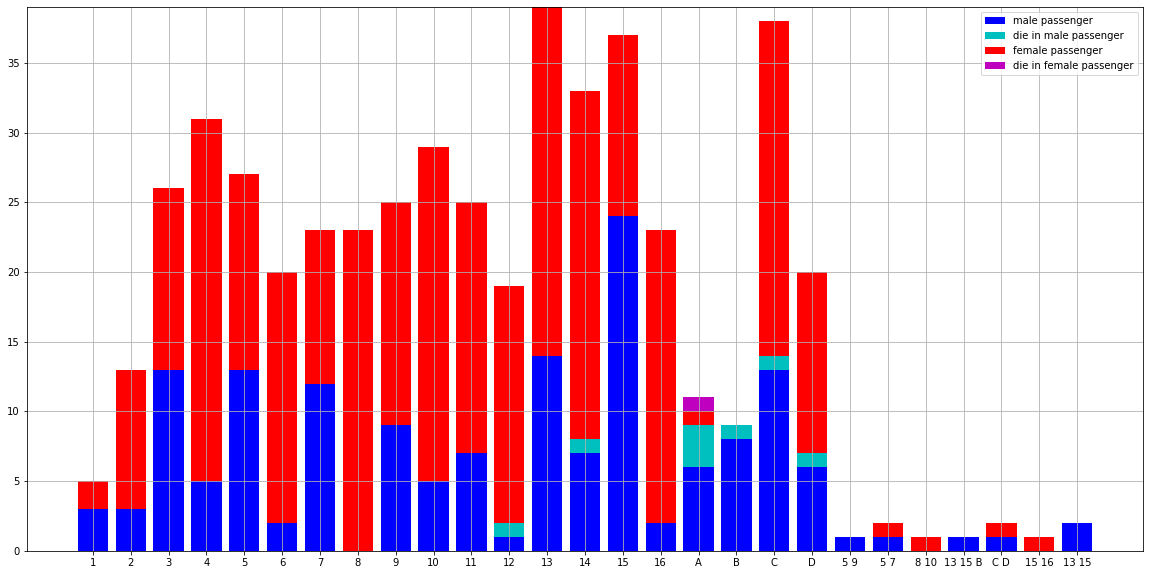

In [45]:
배종류 = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','A','B','C','D','5 9','5 7','8 10','13 15 B','C D','15 16','13 15']
plt.figure(figsize=(20,10))
S_male = []
S_female = []
S_dying_man = []
S_dying_woman = []
for i in 배종류:
  S_male.append(df[(df['boat'] == i) & (df['sex'] == 'male')]['survived'].sum())
  S_female.append(df[(df['boat'] == i) & (df['sex'] == 'female')]['survived'].sum())
  S_dying_man.append(len(df[(df['boat'] == i) & (df['sex'] == 'male') & (df['survived'] == 0)]))
  S_dying_woman.append(len(df[(df['boat'] == i) & (df['sex'] == 'female') & (df['survived'] == 0)]))
S_male = S_male[:27]
S_female = S_female[:27]
S_male = np.array(S_male)
S_female = np.array(S_female)
S_dying_man = np.array(S_dying_man)
S_dying_woman = np.array(S_dying_woman)
plt.bar(배종류, S_male, color='b', label='male passenger')
plt.bar(배종류, S_dying_man, color='c', bottom=S_male, label='die in male passenger')
plt.bar(배종류, S_female, color='r', bottom=S_male+S_dying_man, label='female passenger')
plt.bar(배종류, S_dying_woman, color='m', bottom=S_male+S_dying_man+S_female, label='die in female passenger')
plt.legend()
plt.grid(True)
plt.show()

4, 13, 14, 15, C 보트에 사람이 30명 이상 탑승했다.
그리고 A보트는 11명 탑승했는데 4명이 날아간 것을 관찰.
해당 사망자 중에서는 남자가 8명, 여자가 1명임을 관찰.